# CHAPTER 10 - SIMPLE LINEAR REGRESSION

## By Milena Vignjevic

## What does a Simple Linear Regression Model do?

#### Simple Linear Regression helps us understand how one thing changes as another thing changes. For example, we can figure out how a number of hours that we studied affects to the grade that we got on the test. Using this we can predict test scores if we know the number of hours that we studied.

In [8]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [21]:
data = sns.load_dataset('diamonds')

In [12]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pearson Correlation Coefficent(r-value)
- It mesures the type and strength of the linear correlation between two variables.
- It ranges from -1 to +1 , where +1 indicates a perfect positive relationship, and -1 indicates a perfect negative relationship. 0 indicates no linear relationship between two wariables.
- R-value close to the +1 indicates a strong positive correlation(as one variable increases, the other variable tends to increase as well).
- R-value close to the 11 indicates a strong negative correlation(as one variable increases, the other variable tends to decrease).
- R-value close to 0 indicates no linear correlation between the variables.

In [40]:
diamonds = sns.load_dataset('diamonds')
numeric_columns = diamonds.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()
correlation_matrix.head(7)

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

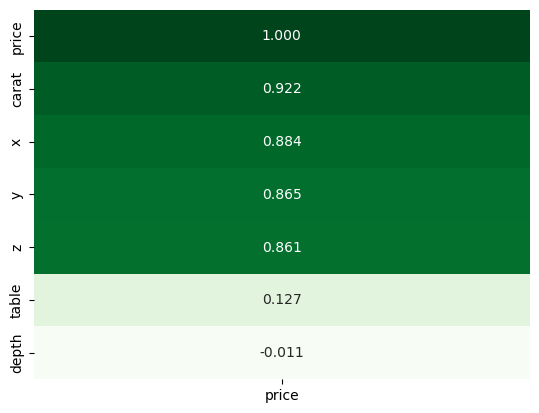

In [51]:
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False), annot=True, cmap='Greens', cbar=False, fmt=f'.3f')

## Procedure for Creating and Using a Regression Model
1. Prepering data, colect and clean the data, hendle missing values 
2. Slection model, we choose the needed regression model based on the problem we have and data caracteristics.
3. Training model, we split data in training and testing sets, and then train the regression model
4. Evaluating data,  we evaluate the preformance of train model using appropriate and validate it with the testing data.

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [73]:
numeric_columns = diamonds.select_dtypes(include=['number'])
correlation_with_price = numeric_columns.corr()['price'].abs ().sort_values(ascending=False)
strongest_correlation_column = correlation_with_price.index[1]
x = diamonds[[strongest_correlation_column]]
y = diamonds['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=20)
                                         

In [82]:
model = LinearRegression()
model

LinearRegression()

In [84]:
model.fit(x_train,y_train)

LinearRegression()

In [86]:
score = model.score(x_test, y_test)
score

0.8504107786474794

In [88]:
y_predict = model.predict(x_test)
y_predict

array([9540.64191438, 1940.07543252, 3180.98424589, ..., 9618.19871522,
       -464.18539337, 5507.68827094])

In [90]:
predict_df = pd.DataFrame({'predicted_price': y_predict})
predict_df.head(3)

,predicted_price
0,9540.641914
1,1940.075433
2,3180.984246


In [136]:
predicted = pd.DataFrame(y_predict,columns=['predicted_price'])
combined = predicted.join([x_test.reset_index(drop=True),
                           y_test.reset_index(drop=True)])
combined = combined[[col for col in combined if col != 'predicted_price'] + ['predicted_price']]
combined.head(5)

,carat,price,predicted_price
0,1.52,8674,9540.641914
1,0.54,1637,1940.075433
2,0.70,2657,3180.984246
3,0.59,1838,2327.859437
4,0.86,2980,4421.893059


In [152]:
melted = pd.melt(combined, id_vars=['carat'],
                 value_vars=['price','predicted_price'],
                 var_name='price_type', value_name='price_value')
melted

,carat,price_type,price_value
0,1.52,price,8674.000000
1,0.54,price,1637.000000
2,0.70,price,2657.000000
3,0.59,price,1838.000000
4,0.86,price,2980.000000
...,...,...,...
32359,0.31,predicted_price,156.269013
32360,1.01,predicted_price,5585.245072
32361,1.53,predicted_price,9618.198715
32362,0.23,predicted_price,-464.185393


C:\Users\vm300\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vm300\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carat', ylabel='price_value'>

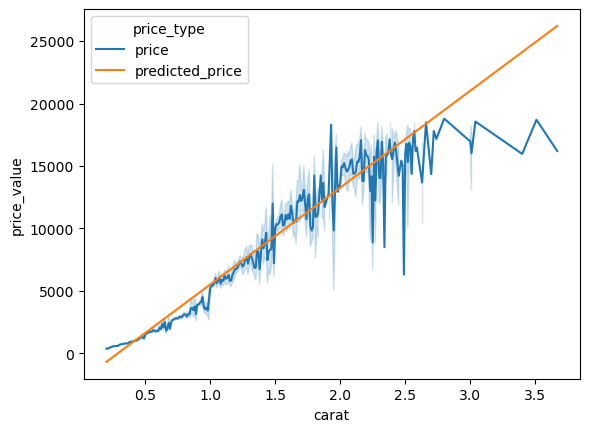

In [175]:
import matplotlib.pyplot as plt
sns.lineplot(data=melted, x='carat',y='price_value', hue= 'price_type')

## Regression line equation is **y = mx +b**, where...
- y is the **dependent** variable
- m is the **slope** of the line
- x is the **independent** variable
- b is the **Y-intercept**

In [179]:
x = data.carat.values.reshape(-1,1)
y = data.price

In [181]:
Ir = LinearRegression()
predicted = Ir.fit(x,y)

In [183]:
m = predicted.coef_
b = predicted.intercept_
print(f'Slope is {m} and the y-intercept is {b}')

Slope is [7756.42561797] and the y-intercept is -2256.3605800453947


In [185]:
print(f"Regression Line Equation: y = {model.coef_[0]:.2f} * x + {model.intercept_:.2f}")

Regression Line Equation: y = 7755.68 * x + -2247.99


In [188]:
carat = 0.70
estimated_price = model.predict([[carat]])[0]
print(f"Estimated price of a {carat:.2f} carat diamond: ${estimated_price:.2f}")

Estimated price of a 0.70 carat diamond: $3180.98


C:\Users\vm300\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [190]:
carat = 0.54
estimated_price = model.predict([[carat]])[0]
print(f"Estimated price of a {carat:.2f} carat diamond: ${estimated_price:.2f}")

Estimated price of a 0.54 carat diamond: $1940.08


C:\Users\vm300\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Estimates are same as the results in the step 18